In [18]:
import pandas as pd
url = "data_v2.csv"
insider = pd.read_csv(url, header=0)
print insider.shape

(79651, 26)


In [28]:
X_train = insider[['side', 'return_t5', "return_t30", "vol_sh_out_pct","stakepct", "stake_pct_chg",  "prev_tran_num"]][:60000]
y_train_5d = insider.return_5d[:60000]
y_train_30d = insider.return_30d[:60000]
y_train_90d = insider.return_90d[:60000]
X_test = insider[['side', 'return_t5', "return_t30", "vol_sh_out_pct","stakepct", "stake_pct_chg",  "prev_tran_num"]][:-18000]
y_test_5d = insider.return_5d[:-18000]
y_test_30d = insider.return_30d[:-18000]
y_test_90d = insider.return_90d[:-18000]

In [29]:
## Import the Classifier.
from sklearn.neighbors import KNeighborsClassifier
## Instantiate the model with 5 neighbors. 
knn = KNeighborsClassifier(n_neighbors=5)
## Fit the model on the training data.
knn.fit(X_train, y_train_5d)
print knn.score(X_test, y_test_5d)
knn.fit(X_train, y_train_30d)
print knn.score(X_test, y_test_30d)
knn.fit(X_train, y_train_90d)
print knn.score(X_test, y_test_90d)

0.728601320335
0.749801300871
0.755754164572


In [25]:
import matplotlib.pyplot as plt  
import numpy as np

def knn_train(n):
    knn2 = KNeighborsClassifier(n_neighbors=n)
    knn2.fit(X_train, y_train_5d)
    return knn2.score(X_test, y_test_5d)

x = np.arange(1, 20, 1)

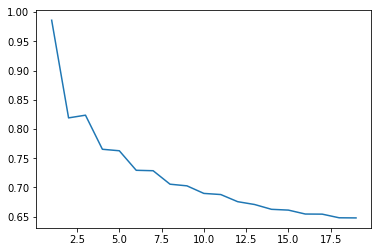

In [27]:
y = []
for i in x:
    y.append(knn_train(i))

plt.plot(x, np.asarray(y))
plt.show()